In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import scipy
from sklearn.metrics import mean_squared_error

def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12], dtype=float).reshape(-1, 1)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36]).reshape(-1, 1)


print(len(x), len(y))


12 12


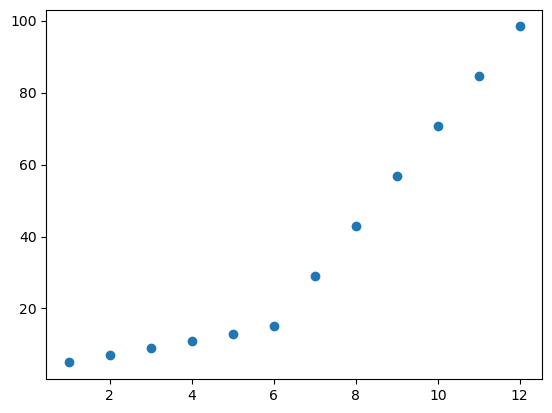

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:

def pwr(x, y):
    x_idx = list(range(len(x)))
    best_knot = None 
    lowest_error = float("inf")
    best_knot_f = None 
    lowest_error_f = float("inf")
    for knot_idx in x_idx[2:-2]:

        l_x = x[:knot_idx]
        r_x = x[knot_idx:]
        l_y = y[:knot_idx]
        r_y = y[knot_idx:]

        f_total = 0 
        mse = 0

        l1 = LinearRegression()
        l1.fit(l_x, l_y)
        y_hat = l1.predict(l_x)
        f_total += f_test(y_hat, l_y)[0]
        mse += mean_squared_error(y_hat, l_y)

        l2 = LinearRegression()
        l2.fit(r_x, r_y)
        y_hat = l2.predict(r_x)
        f_total += f_test(y_hat, r_y)[0]
        mse += mean_squared_error(y_hat, r_y)

        if mse < lowest_error:
            lowest_error = mse 
            best_knot = knot_idx 

        if f_total < lowest_error_f:
            lowest_error_f = f_total 
            best_knot_f = knot_idx

    return best_knot, best_knot_f

a, b = pwr(x,y)


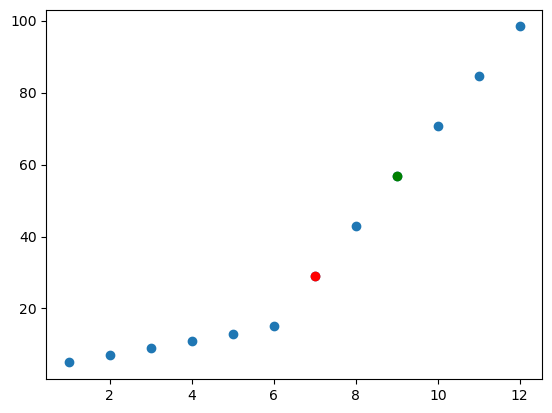

In [8]:
def plot_pwr(x, y, best_knot, best_knot_f):
    plt.scatter(x, y)
    plt.scatter(x[best_knot], y[best_knot],c='red')
    plt.scatter(x[best_knot_f], y[best_knot_f], c='green')
    plt.show()

plot_pwr(x, y, a, b)